# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
''' Importing the required packges'''
import numpy as np
import pandas as pd
''' Additional packages for good plottings '''
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [2]:
def cal_confusion_matrix(dataset):
    true_poitive, false_positive, false_negative, true_negative = 0,0,0,0
    for item in dataset:
        ground_pred = int(item[0])
        model_pred  = int(item[1])
        '''  calculate true postive '''
        if (ground_pred==1) and  (model_pred==1):
            true_poitive +=1
        elif (ground_pred==0) and  (model_pred==1):
            false_positive +=1
        elif (ground_pred==1) and  (model_pred==0):
            false_negative +=1
        elif (ground_pred==0) and  (model_pred==0):
            true_negative +=1
        ''' Return all the values '''
    return true_poitive, false_positive, false_negative, true_negative


def get_custuom_scores(tp, fp, fn, tn):
    precision          = tp/(tp+fp)
    recall             = tp/(tp+fn)
    accuracy           = (tp+tn)/(tp+fp+fn+tn)
    f1_score           = (2*precision*recall)/(precision+recall)
    true_postive_rate  = tp/(tp+fn)
    false_negative_rate= fp/(tn+fp)
#     print(precision, recall, accuracy, f1_score, true_postive_rate, false_negative_rate)
    return precision, recall, accuracy, f1_score, true_postive_rate, false_negative_rate

''' F'''
def return_tpr_fpr(dataset_details,source_col='y',prop_col='proba',target_col='custum_threshold'):
    all_sorted_thresholds = sorted(dataset_details['proba'].unique())
    ''' Finding the tpr and fpr values'''
    all_tpr_fpr= []
    for each_threshold in all_sorted_thresholds:
        dataset_details[target_col] = dataset_details[prop_col].apply(lambda x: 0 if x <each_threshold else 1)
        each_true_poitive, each_false_positive, each_false_negative, each_true_negative = cal_confusion_matrix(zip(dataset_details[source_col],dataset_details[target_col]))
#         print(each_true_poitive, each_false_positive, each_false_negative, each_true_negative)
        _,_,_,_,each_true_pos, each_false_pos = get_custuom_scores(each_true_poitive, each_false_positive, each_false_negative, each_true_negative)
        all_tpr_fpr.append([each_true_pos, each_false_pos])
    ''' Again sorting them '''
    all_tpr_fpr = sorted(all_tpr_fpr)
    all_threshold_tpr ,all_threshold_fpr = [], []
    for each_tpr_fpr in all_tpr_fpr:
        all_threshold_tpr.append(each_tpr_fpr[0])
        all_threshold_fpr.append(each_tpr_fpr[1])
    return all_threshold_tpr ,all_threshold_fpr

In [3]:
''' Doing first task, by loading the 5_a.csv file'''
first_file_performance = pd.read_csv('5_a.csv')
first_file_performance['y_pred'] = first_file_performance['proba'].apply(lambda x: 0 if x <0.5 else 1)
first_file_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 3 columns):
y         10100 non-null float64
proba     10100 non-null float64
y_pred    10100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 236.8 KB


In [4]:
''' Getting the required details'''
get_true_poitive, get_false_positive, get_false_negative, get_true_negative = cal_confusion_matrix(zip(first_file_performance['y'],first_file_performance['y_pred']))
_, _, first_accuracy, first_f1_score, first_true_postive_rate, first_false_negative_rate = get_custuom_scores(get_true_poitive, get_false_positive, get_false_negative, get_true_negative)
first_consution_matrix = [[get_true_poitive, get_false_positive],[get_false_negative, get_true_negative]]

In [5]:
''' printing the first_consution_matrix'''
print(first_consution_matrix)

[[10000, 100], [0, 0]]


[[10000, 100], [0, 0]]


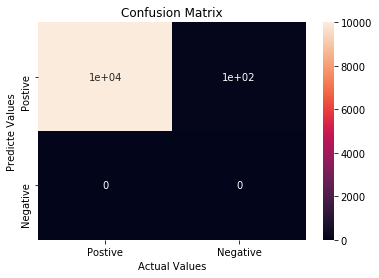

In [6]:
#code referenced from google search results
''' setting the plot'''
custom_plot= plt.subplot()
#annot=True to annotate cells
sns.heatmap(first_consution_matrix, annot=True, ax = custom_plot);
print(first_consution_matrix)
# labels, title and ticks
custom_plot.set_xlabel('Actual Values');
custom_plot.set_ylabel('Predicte Values'); 
custom_plot.set_title('Confusion Matrix'); 
custom_plot.xaxis.set_ticklabels(['Postive', 'Negative']); 
custom_plot.yaxis.set_ticklabels(['Postive', 'Negative']);

In [7]:
''' printing the first_f1_score'''
print(first_f1_score)

0.9950248756218906


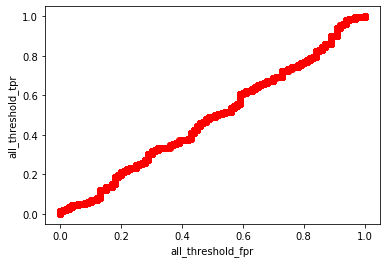

0.48829900000000004


In [8]:
''' - Displaying the plot by showing the tradeoff between trp vs fpr
    - printing the auc score
'''
get_first_trp,get_first_fpr = return_tpr_fpr(first_file_performance)
import matplotlib.pyplot as plt
plt.plot(get_first_fpr,get_first_trp, 'ro')
plt.xlabel('all_threshold_fpr')
plt.ylabel('all_threshold_tpr')
plt.show()
AUC = np.trapz(get_first_trp,get_first_fpr)
print(AUC)

In [9]:
''' printing the first_accuracy'''
print(first_accuracy)

0.9900990099009901


<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [10]:
'''Doing second task, by loading the 5_b.csv file '''
second_file_performance = pd.read_csv('5_b.csv')
second_file_performance['y_pred'] = second_file_performance['proba'].apply(lambda x: 0 if x <0.5 else 1)
second_file_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 3 columns):
y         10100 non-null float64
proba     10100 non-null float64
y_pred    10100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 236.8 KB


In [11]:
''' Getting the required details'''
get_true_poitive, get_false_positive, get_false_negative, get_true_negative = cal_confusion_matrix(zip(second_file_performance['y'],second_file_performance['y_pred']))
_, _, second_accuracy, second_f1_score, second_true_postive_rate, second_false_negative_rate = get_custuom_scores(get_true_poitive, get_false_positive, get_false_negative, get_true_negative)
second_consution_matrix = [[get_true_poitive, get_false_positive],[get_false_negative, get_true_negative]]

In [12]:
''' printing the second_consution_matrix'''
print(second_consution_matrix)


[[55, 239], [45, 9761]]


[[55, 239], [45, 9761]]


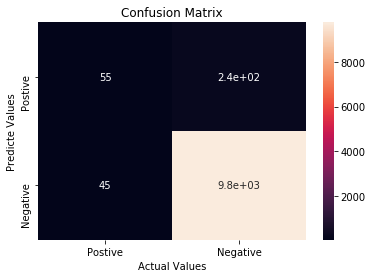

In [13]:
#code referenced from google search results
''' setting the plot'''
custom_plot= plt.subplot()
#annot=True to annotate cells
sns.heatmap(second_consution_matrix, annot=True, ax = custom_plot);
print(second_consution_matrix)
# labels, title and ticks
custom_plot.set_xlabel('Actual Values');
custom_plot.set_ylabel('Predicte Values'); 
custom_plot.set_title('Confusion Matrix'); 
custom_plot.xaxis.set_ticklabels(['Postive', 'Negative']); 
custom_plot.yaxis.set_ticklabels(['Postive', 'Negative']);

In [14]:
''' printing the second_f1_score'''
print(second_f1_score)

0.2791878172588833


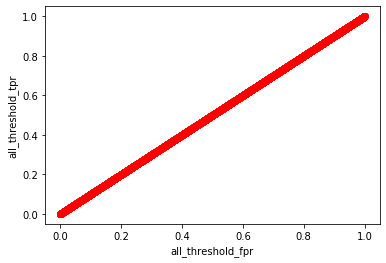

0.5


In [15]:
''' - Displaying the plot by showing the trade-off between trp vs fpr
    - printing the auc score
'''
get_second_trp,get_second_fpr = return_tpr_fpr(second_file_performance)
import matplotlib.pyplot as plt
plt.plot(get_second_fpr,get_second_fpr, 'ro')
plt.xlabel('all_threshold_fpr')
plt.ylabel('all_threshold_tpr')
plt.show()
AUC = np.trapz(get_second_fpr,get_second_fpr)
print(AUC)

In [16]:
''' printing the second_accuracy'''
print(second_accuracy)

0.9718811881188119


<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [17]:
'''Doing third task, by loading the 5_c.csv file '''
third_file_performance = pd.read_csv('5_c.csv')
third_file_performance.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [18]:
''' For calculating all AUC according to the threshold '''
all_third_thresholds = third_file_performance['prob']
all_a_values = []
for each_threshold in all_third_thresholds:
    third_file_performance['custum_threshold'] = third_file_performance['prob'].apply(lambda x: 0 if x <each_threshold else 1)
    each_true_poitive, each_false_positive, each_false_negative, each_true_negative = cal_confusion_matrix(zip(third_file_performance['y'],third_file_performance['custum_threshold']))
    A_CURR = (100 * each_false_positive)+(500*each_false_negative)
    all_a_values.append(A_CURR)

In [19]:
''' Getting min threshold 
    - other approach is using lambda sorted as shown below 
    - sorted_thresholds_map = sorted(zip(all_third_thresholds,all_a_values),key = lambda arr:arr[1]) & get sorted_thresholds_map[0]
'''
get_best_threshold_details = all_third_thresholds[all_a_values.index(min(all_a_values))],min(all_a_values)
print(get_best_threshold_details[0])

0.2300390278970873


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [20]:
'''Doing forth task, by loading the 5_d.csv file '''
fourth_file_performance = pd.read_csv('5_d.csv')
fourth_file_performance.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [21]:
'''Prining MSR '''
fourth_file_performance['custum_error'] = fourth_file_performance['y']-fourth_file_performance['pred']
square_errors = fourth_file_performance['custum_error']**2
mean_square_error = square_errors.sum()/len(fourth_file_performance)
print(mean_square_error)

177.16569974554707


In [22]:
'''Prining MAPE '''
absolute_errors = np.absolute(fourth_file_performance['custum_error'])
MAPE = absolute_errors.sum()/(fourth_file_performance['y'].sum())
print(MAPE)

0.1291202994009687


In [23]:
'''Prining R2 Error '''
Y_BAR    = fourth_file_performance['y'].sum()/len(fourth_file_performance['y'])
ss_total = ((fourth_file_performance['y']-Y_BAR)**2).sum()
ss_res   = square_errors.sum()
R2_ERROR = 1-(ss_res/ss_total)
print(R2_ERROR)

0.9563582786990937
